# Spotify Song Recommendations

### **Column Descriptions**

**track_id:** The Spotify ID for the track

**artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;

**album_name**: The album name in which the track appears

**track_name**: Name of the track

**popularity**: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

**duration_ms**: The track length in milliseconds

**explicit**: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

**danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least
danceable and 1.0 is most danceable

**energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

**key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

**loudness**: The overall loudness of a track in decibels (dB)

**mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

**instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

**valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

**tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

**time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

**track_genre**: The genre in which the track belongs


## Import Dataset

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_full = pd.read_csv("/content/drive/MyDrive/Spotify dataset.csv")
data = data_full#.sample(n=5000, random_state=0).reset_index()

In [ ]:
data.shape

(114000, 21)

In [ ]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

## Data Exploration, Cleaning, & Pre-Processing

In [ ]:
# drop Unnamed: 0 - just row number
#data = data.drop(columns = ['Unnamed: 0', 'index'])
data = data.drop(columns = ['Unnamed: 0'])

In [ ]:
g = set(data['track_genre'])

In [ ]:
#Check for duplicated entries
print("Number of duplicated entries:", data.duplicated().sum())
data.drop_duplicates(inplace = True)

Number of duplicated entries: 450


In [ ]:
# create column that combines song and artists
data['dupe_check'] = data['track_name'] + data['artists']

In [ ]:
# remove duplicate song/artists
print("Number of duplicated entries:", data.duplicated(subset='dupe_check', keep="first").sum())
data = data.drop_duplicates(subset='dupe_check', keep="first")

Number of duplicated entries: 32206


In [ ]:
g2 = set(data['track_genre'])

In [ ]:
g-g2

{'songwriter'}

In [ ]:
data.shape

(81344, 21)

In [ ]:
data = data.reset_index()

In [ ]:
data.columns

Index(['index', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'dupe_check'],
      dtype='object')

In [ ]:
data = data.drop(columns = ['index', 'dupe_check'])

In [ ]:
data['explicit'] = data["explicit"].astype(int)

In [ ]:
data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,81344.000000,8.134400e+04,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000
mean,34.635966,2.314117e+05,0.085538,0.559275,0.635025,5.285922,-8.593940,0.632339,0.088992,0.329670,0.184731,0.219721,0.463280,122.145034,3.896968
std,19.438777,1.164945e+05,0.279682,0.177746,0.258639,3.557612,5.304765,0.482171,0.116628,0.339961,0.331591,0.198271,0.263383,30.128881,0.456396
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738710e+05,0.000000,0.446000,0.455000,2.000000,-10.451250,0.000000,0.036100,0.015900,0.000000,0.098500,0.241000,99.408000,4.000000
50%,35.000000,2.152040e+05,0.000000,0.573000,0.678000,5.000000,-7.262000,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000,4.000000
75%,49.000000,2.673460e+05,0.000000,0.690000,0.857000,8.000000,-5.140000,1.000000,0.087000,0.629000,0.153000,0.283000,0.676000,140.128250,4.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
# what are the datatypes?
data.dtypes.value_counts()

float64    9
int64      6
object     5
dtype: int64

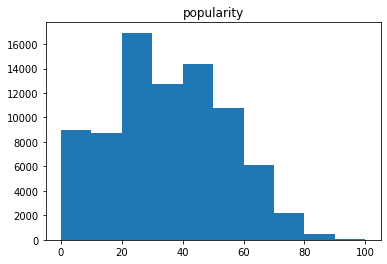

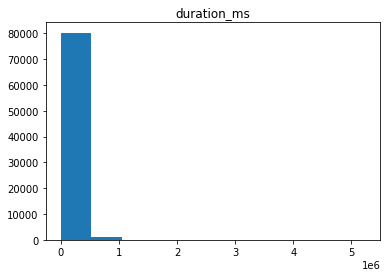

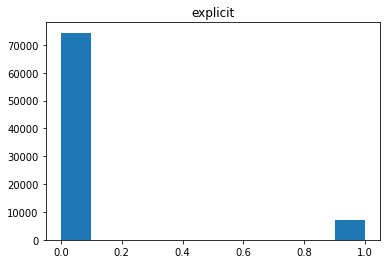

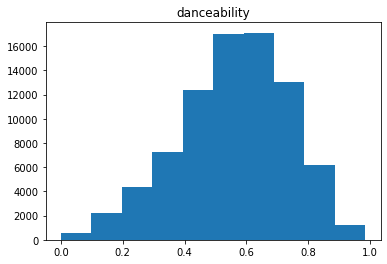

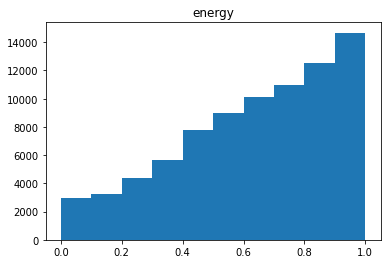

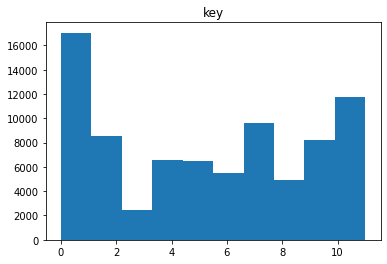

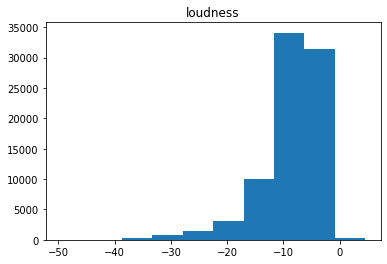

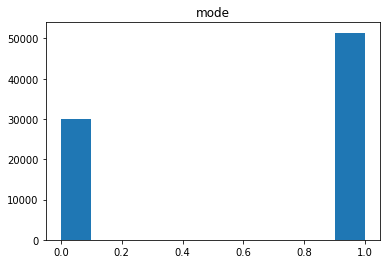

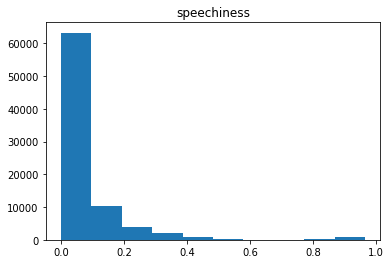

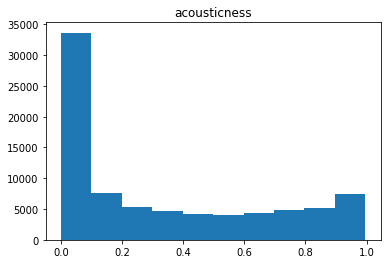

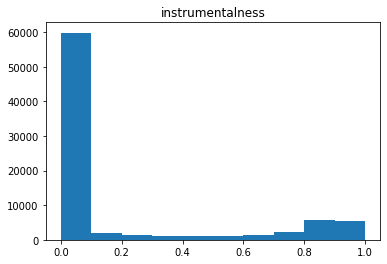

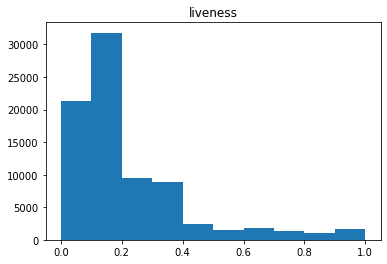

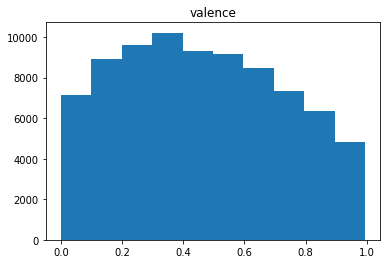

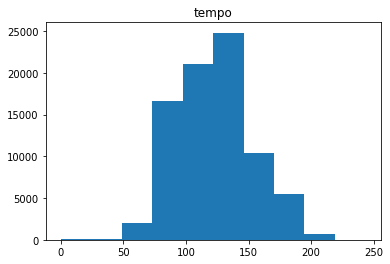

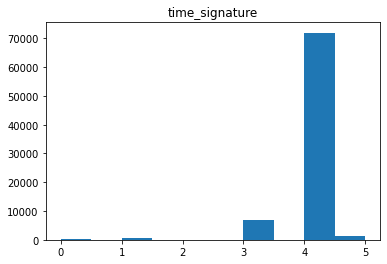

In [ ]:
# histograms for numeric columns
for col in data.columns:
  if data[col].dtype in ('float', 'int'):
    plt.hist(data[col])
    plt.title(col)
    plt.show()

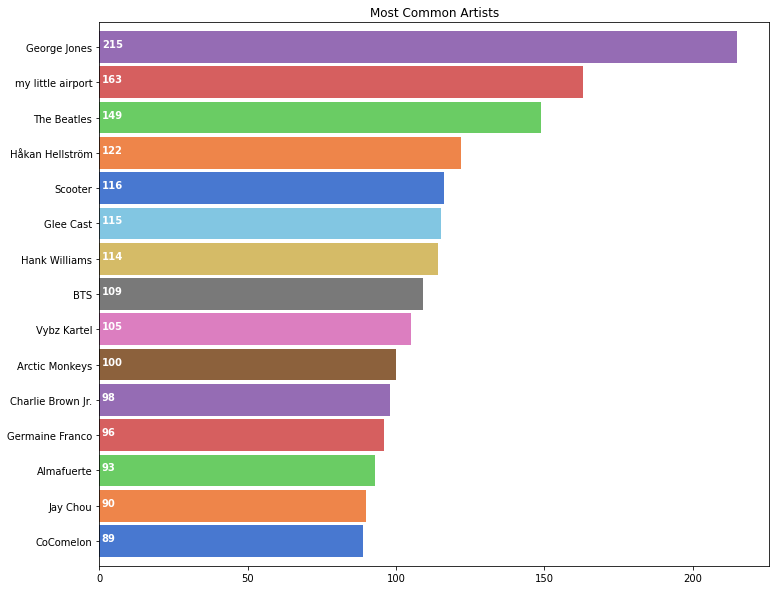

In [ ]:
plt.subplots(figsize=(12,10))
ax=data['artists'].value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(data['artists'].value_counts()[:15].sort_values(ascending=True).values):
  ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Most Common Artists')
plt.show()

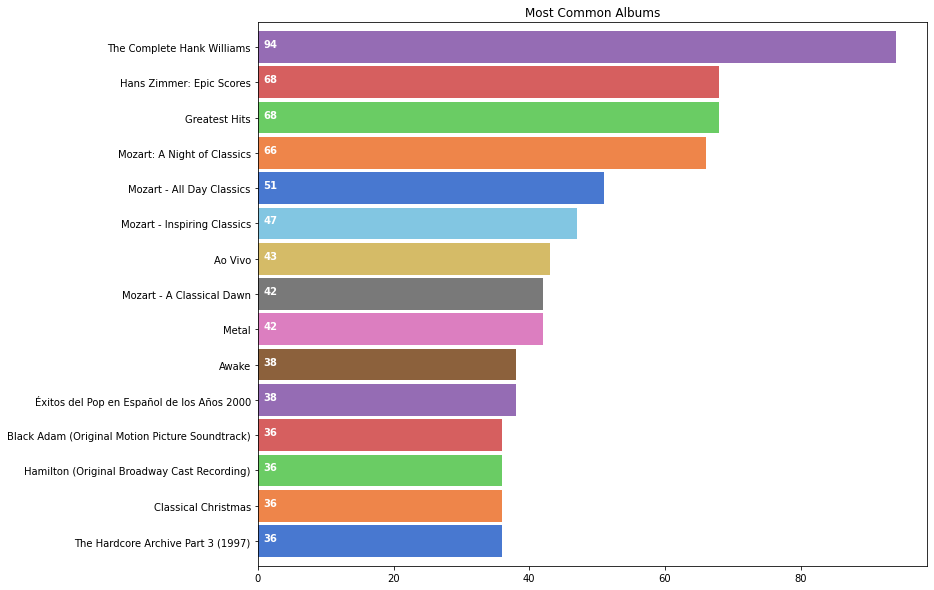

In [ ]:
plt.subplots(figsize=(12,10))
ax=data['album_name'].value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(data['album_name'].value_counts()[:15].sort_values(ascending=True).values):
  ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Most Common Albums')
plt.show()

In [ ]:
len(data['track_genre'].value_counts())
# create binary columns to mark genre

113

In [ ]:
data['track_genre'].value_counts()

study          996
black-metal    991
comedy         987
heavy-metal    985
bluegrass      978
              ... 
rock           167
reggae         166
house          134
indie          107
reggaeton       63
Name: track_genre, Length: 113, dtype: int64

In [ ]:
# get distinct genres

set(data['track_genre']) # should we create another column that groups these as similar genres?
# might be more helpful than standalone genres - especially with the different types of rock / electronic / etc.

{'acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie',
 'indie-pop',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop',
 'pop-film',
 'power-pop',
 'progressive

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# use OneHotEncoder to create binary 1/0 columns for genre types

# save original dataframe
original = data.copy()

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# pass track_genre
enc_df = pd.DataFrame(enc.fit_transform(data[['track_genre']]).toarray())

# merge with main data on key values
data = data.join(enc_df)


In [ ]:
len(data['artists'].value_counts())
# 31437 distinct artist values - would make very sparse categories

31437

In [ ]:
len(data['album_name'].value_counts())
# same issue as artist - very sparse

45094

In [ ]:
data.iloc[1][4:134] # removes the track ID and other string columns

popularity          55
duration_ms     149610
explicit             0
danceability      0.42
energy           0.166
                 ...  
108                0.0
109                0.0
110                0.0
111                0.0
112                0.0
Name: 1, Length: 129, dtype: object

In [ ]:
data[data.columns[4:19]]

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81339,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
81340,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
81341,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
81342,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Calculate Distance and Find KNN

In [ ]:
# calculate cosine distance & find nearest neighbors based on distances

from scipy import spatial

def get_neighbors(vector, ind, data):

  d = []

  for i in range(len(data)):
    if i != ind:
      d.append(spatial.distance.cosine(vec, data.iloc[i][4:len(data.columns)-1]))
      #print(i)

  d = np.array(d)
  neighbors = np.argpartition(d, -10)

  neighbors_df = pd.DataFrame(list(zip(d[neighbors], neighbors)), columns = ['distance', 'index_values'])
  neighbors_sorted = neighbors_df.sort_values(by = ["distance"])

  return neighbors_sorted



In [ ]:
data.sample(n=5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,103,104,105,106,107,108,109,110,111,112
19541,2WaA5bVXcIqqpz9j0gd7qK,Michael Calfan,Resurrection,Resurrection - Axwell's Recut Radio Version,59,166874,0,0.666,0.952,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26139,7mTu2ZcNb2Ip79YEzZZnrf,Kid Francescoli,Nopalitos,Nopalitos,60,230089,0,0.607,0.583,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75999,3leVSmwGhwAlLvRj3yKZUb,flora cash,OVER,OVER - Single Version,43,205874,0,0.624,0.588,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59114,5kqaW2UxXrcLadZRDxi6z2,Mallorca Allstars;Isi Glück;Ikke Hüftgold;Almk...,Eine Liebe,Eine Liebe - Mallorca Mix,39,215342,0,0.457,0.952,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58508,4xXdQBMlwphSnCl5thfXFK,Art Popular,Ao Vivo Sem Abuso,Primeiro Beijo - Ao Vivo,47,224560,0,0.528,0.805,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# ids of songs that we are familiar with
data_sample = ['7w0Slb6gsL8dM2RmBCUUr5',
               '55yvzYuvJYG2RUEnMK78tr',
               '2hHLbkatPwOOmrNxTiD41L']

In [ ]:
# remove track_genre for ease in creating vectors
data_cosine = data.drop(columns = 'track_genre')

In [ ]:
# find neighbors for sample list of songs and print top 5 neighbors/recommendations

for track_id in data_sample:
  ind = data_cosine[data_cosine['track_id'] == track_id].index[0]
  vec = data_cosine.iloc[ind][4:len(data_cosine.columns)-1]
  neighbors = get_neighbors(vec, ind, data_cosine)
  print("------------------------------ Song Choice --------------------------------")
  print()
  print(data.iloc[ind][1:4])
  print()
  print("-------------------------- Song Recommendations ---------------------------")
  print()
  for i in range(0,5):
    print(data.iloc[neighbors['index_values'].iloc[i]][1:4])
    print()

  print("####################################################################################################")
  print()
  print()


------------------------------ Song Choice --------------------------------

artists                                            Piano Sunday
album_name             Relaxing Piano Scores: Disney Love Songs
track_name    Beauty and the Beast (from 'Beauty and the Bea...
Name: 22732, dtype: object

-------------------------- Song Recommendations ---------------------------

artists                               Jartisto
album_name    Lullabies from the Movies, Vol.1
track_name    I See the Light (from "Tangled")
Name: 22586, dtype: object

artists                                       Monique
album_name    Pocahontas (Originalt Dansk Soundtrack)
track_name                             Vindens Farver
Name: 22509, dtype: object

artists           Martin Lawrence
album_name      Doin' Time: Uncut
track_name    Fresh Running Water
Name: 16320, dtype: object

artists                                   George Winston
album_name    Linus & Lucy - The Music of Vince Guaraldi
track_name             

## Feature Engineering & Second Model

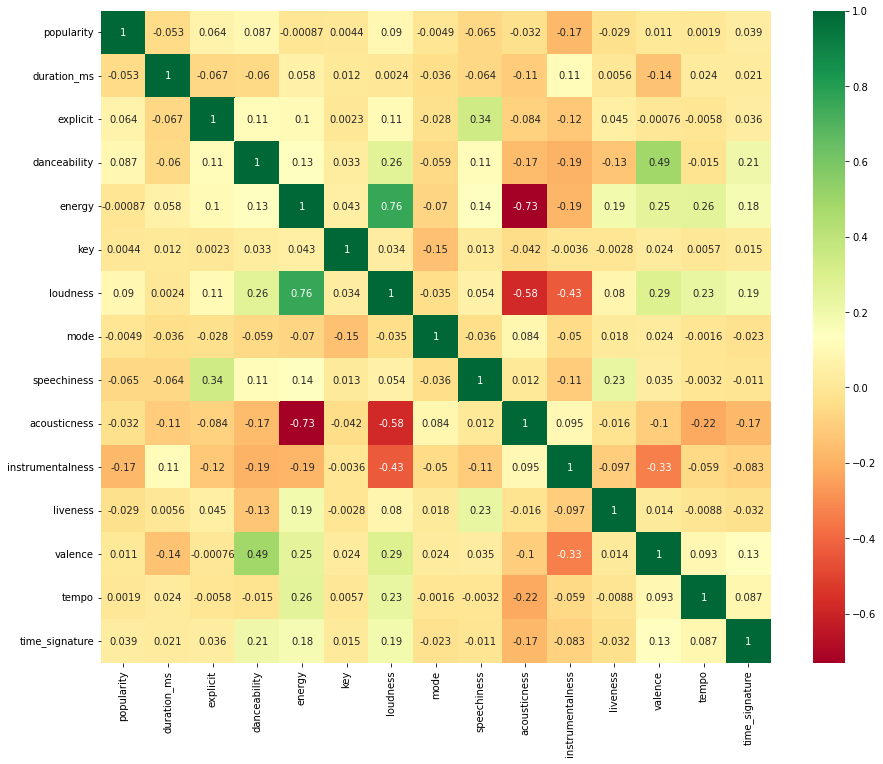

In [ ]:
import seaborn as sns
corrmat = original.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,12))
g=sns.heatmap(original[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
c = corrmat.abs()

s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False)
df = pd.DataFrame(so).reset_index()
df.columns = ['Feature_1', 'Feature_2','corr']
df_new = df.drop(df[(df['corr'] == 1.0)].index)
l=df_new['Feature_1'].head(20)
l=l.drop_duplicates()
l

15              energy
16            loudness
17        acousticness
21             valence
22        danceability
23    instrumentalness
25            explicit
26         speechiness
34               tempo
Name: Feature_1, dtype: object

In [ ]:
f = df_new['Feature_2'].head(20).drop_duplicates()
f

15            loudness
16              energy
18        acousticness
21        danceability
22             valence
24    instrumentalness
25         speechiness
26            explicit
33               tempo
Name: Feature_2, dtype: object

In [ ]:
df_new

,Feature_1,Feature_2,corr
15,energy,loudness,0.761042
16,loudness,energy,0.761042
17,acousticness,energy,0.731105
18,energy,acousticness,0.731105
19,loudness,acousticness,0.582130
...,...,...,...
220,tempo,mode,0.001612
221,popularity,energy,0.000866
222,energy,popularity,0.000866
223,valence,explicit,0.000761


In [ ]:
# create new dataframe with engineered features & label encodings

cols = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
for i in range(len(f)):
  cols.append(f.values[i])

data_new = original[cols]

# save original dataframe
original_new = data_new.copy()

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# pass track_genre
enc_df = pd.DataFrame(enc.fit_transform(data_new[['track_genre']]).toarray())

# merge with main data on key values
data_new = data_new.join(enc_df)

data_new.head()

,track_id,artists,album_name,track_name,track_genre,loudness,energy,acousticness,danceability,valence,...,103,104,105,106,107,108,109,110,111,112
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic,-6.746,0.4610,0.0322,0.676,0.715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic,-17.235,0.1660,0.9240,0.420,0.267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic,-9.734,0.3590,0.2100,0.438,0.120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic,-18.515,0.0596,0.9050,0.266,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic,-9.681,0.4430,0.4690,0.618,0.167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# remove track_genre for ease in creating vectors
data_new2 = data_new.drop(columns = 'track_genre')

In [ ]:
# find neighbors for sample list of songs and print top 5 neighbors/recommendations

for track_id in data_sample:
  ind = data_new[data_new2['track_id'] == track_id].index[0]
  vec = data_new2.iloc[ind][4:len(data_new2.columns)-1]
  neighbors = get_neighbors(vec, ind, data_new2)
  print("------------------------------ Song Choice --------------------------------")
  print()
  print(data_new.iloc[ind][1:4])
  print()
  print("-------------------------- Song Recommendations ---------------------------")
  print()
  for i in range(0,5):
    print(data_new.iloc[neighbors['index_values'].iloc[i]][1:4])
    print()

  print("####################################################################################################")
  print()
  print()

------------------------------ Song Choice --------------------------------

artists                                            Piano Sunday
album_name             Relaxing Piano Scores: Disney Love Songs
track_name    Beauty and the Beast (from 'Beauty and the Bea...
Name: 22732, dtype: object

-------------------------- Song Recommendations ---------------------------

artists       Cameron's Bedtime Classics
album_name           Lullabies and Magic
track_name                      Carousel
Name: 22684, dtype: object

artists                       Piano Sunday
album_name          Heartfelt Movie Scores
track_name    S.T.A.Y. (From Interstellar)
Name: 22481, dtype: object

artists                              The Sleep Diaries
album_name         Lullaby Versions of Disney Classics
track_name    Jessie's Song (Part 1, from "Toy Story")
Name: 22789, dtype: object

artists                                          Piano Radiance
album_name    Piano for Kittens and Cats: sounds to soothe y.

## Third Model - Genre Grouping

In [ ]:
# upload grouped genres and join on track_genre
g = pd.read_excel("/content/drive/MyDrive/genre work.xlsx")
data_new3 = original.merge(g, on = 'track_genre', how = 'left')

In [ ]:
data_new3.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'genre_group'],
      dtype='object')

In [ ]:
# did all genres get new group assignment?
len(data_new3['track_genre'].values)==len(data_new3['genre_group'].values)

True

In [ ]:
print("genre count:", len(data_new3['track_genre'].value_counts()),
      "\ngenre group count:", len(data_new3['genre_group'].value_counts()))

genre count: 113 
genre group count: 21


In [ ]:
# one hot encoding for smaller genre group

# create new dataframe with engineered features & label encodings
data_copy2 = data_new3.copy()

cols = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'genre_group']
for i in range(len(f)):
  cols.append(f.values[i])

data_new3 = data_new3[cols]

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# pass track_genre
enc_df = pd.DataFrame(enc.fit_transform(data_new3[['genre_group']]).toarray())

# merge with main data on key values
data_new3 = data_new3.join(enc_df)

data_new3.head()


,track_id,artists,album_name,track_name,track_genre,genre_group,loudness,energy,acousticness,danceability,...,11,12,13,14,15,16,17,18,19,20
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic,genre13,-6.746,0.4610,0.0322,0.676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic,genre13,-17.235,0.1660,0.9240,0.420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic,genre13,-9.734,0.3590,0.2100,0.438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic,genre13,-18.515,0.0596,0.9050,0.266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic,genre13,-9.681,0.4430,0.4690,0.618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_new3.columns

Index([        'track_id',          'artists',       'album_name',
             'track_name',      'track_genre',      'genre_group',
               'loudness',           'energy',     'acousticness',
           'danceability',          'valence', 'instrumentalness',
            'speechiness',         'explicit',            'tempo',
                        0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18,                 19,                 20],
      dtype='object')

In [ ]:
# remove track_genre & genre_group for ease in creating vectors
data_new4 = data_new3.drop(columns = ['track_genre', 'genre_group'])
data_new4.columns

Index([        'track_id',          'artists',       'album_name',
             'track_name',         'loudness',           'energy',
           'acousticness',     'danceability',          'valence',
       'instrumentalness',      'speechiness',         'explicit',
                  'tempo',                  0,                  1,
                        2,                  3,                  4,
                        5,                  6,                  7,
                        8,                  9,                 10,
                       11,                 12,                 13,
                       14,                 15,                 16,
                       17,                 18,                 19,
                       20],
      dtype='object')

In [ ]:
# find neighbors for sample list of songs and print top 5 neighbors/recommendations

for track_id in data_sample:
  ind = data_new4[data_new4['track_id'] == track_id].index[0]
  vec = data_new4.iloc[ind][4:len(data_new4.columns)-1]
  neighbors = get_neighbors(vec, ind, data_new4)
  print("------------------------------ Song Choice --------------------------------")
  print()
  print(data_new3.iloc[ind][1:4])
  print()
  print("-------------------------- Song Recommendations ---------------------------")
  print()
  for i in range(0,5):
    print(data_new.iloc[neighbors['index_values'].iloc[i]][1:4])
    print()

  print("####################################################################################################")
  print()
  print()

------------------------------ Song Choice --------------------------------

artists                                            Piano Sunday
album_name             Relaxing Piano Scores: Disney Love Songs
track_name    Beauty and the Beast (from 'Beauty and the Bea...
Name: 22732, dtype: object

-------------------------- Song Recommendations ---------------------------

artists       Cameron's Bedtime Classics
album_name           Lullabies and Magic
track_name                      Carousel
Name: 22684, dtype: object

artists                               All 4 Kids
album_name    Top 25 Children's Lullaby Classics
track_name                       Brahms' Lullaby
Name: 12568, dtype: object

artists                       Piano Sunday
album_name          Heartfelt Movie Scores
track_name    S.T.A.Y. (From Interstellar)
Name: 22481, dtype: object

artists                              The Sleep Diaries
album_name         Lullaby Versions of Disney Classics
track_name    Jessie's Song (Part

## Model 4:  Break the vector into two

Issues:  Attempted to also create artist and album binary columns but runtime continued to crash.

In [ ]:
def get_neighbors_new(vec, genre_vec, ind, data):

  d = []

  for i in range(len(data)):
    if i != ind:
      a = spatial.distance.cosine(vec, data.iloc[i][4:13])
      b = spatial.distance.cosine(genre_vec, data.iloc[i][13:len(data_new4.columns)-1])
      d.append(a+b)

  d = np.array(d)
  neighbors = np.argpartition(d, -10)

  neighbors_df = pd.DataFrame(list(zip(d[neighbors], neighbors)), columns = ['distance', 'index_values'])
  neighbors_sorted = neighbors_df.sort_values(by = ["distance"])

  return neighbors_sorted



In [ ]:
# find neighbors for sample list of songs and print top 5 neighbors/recommendations

for track_id in data_sample:
  ind = data_new4[data_new4['track_id'] == track_id].index[0]
  vec = data_new4.iloc[ind][4:13]
  genre_vec = data_new4.iloc[ind][13:len(data_new4.columns)-1]
  neighbors = get_neighbors_new(vec, genre_vec, ind, data_new4)
  print("------------------------------ Song Choice --------------------------------")
  print()
  print(data_new3.iloc[ind][1:4])
  print()
  print("-------------------------- Song Recommendations ---------------------------")
  print()
  for i in range(0,5):
    print(data_new.iloc[neighbors['index_values'].iloc[i]][1:4])
    print()

  print("####################################################################################################")
  print()
  print()


/usr/local/lib/python3.8/dist-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


------------------------------ Song Choice --------------------------------

artists                                            Piano Sunday
album_name             Relaxing Piano Scores: Disney Love Songs
track_name    Beauty and the Beast (from 'Beauty and the Bea...
Name: 22732, dtype: object

-------------------------- Song Recommendations ---------------------------

artists       Cameron's Bedtime Classics
album_name           Lullabies and Magic
track_name                      Carousel
Name: 22684, dtype: object

artists                               All 4 Kids
album_name    Top 25 Children's Lullaby Classics
track_name                       Brahms' Lullaby
Name: 12568, dtype: object

artists                              The Sleep Diaries
album_name         Lullaby Versions of Disney Classics
track_name    Jessie's Song (Part 1, from "Toy Story")
Name: 22789, dtype: object

artists                       Piano Sunday
album_name          Heartfelt Movie Scores
track_name    S.T.A.Y

## Model 5 - Exclude genre completely

In [ ]:
def get_neighbors_new_2(vec, ind, data):

  d = []

  for i in range(len(data)):
    if i != ind:
      a = spatial.distance.cosine(vec, data.iloc[i][4:13])
      d.append(a)

  d = np.array(d)
  neighbors = np.argpartition(d, -10)

  neighbors_df = pd.DataFrame(list(zip(d[neighbors], neighbors)), columns = ['distance', 'index_values'])
  neighbors_sorted = neighbors_df.sort_values(by = ["distance"])

  return neighbors_sorted


In [ ]:
# find neighbors for sample list of songs and print top 5 neighbors/recommendations

for track_id in data_sample:
  ind = data_new4[data_new4['track_id'] == track_id].index[0]
  vec = data_new4.iloc[ind][4:13]
  neighbors = get_neighbors_new_2(vec, ind, data_new4)
  print("------------------------------ Song Choice --------------------------------")
  print()
  print(data_new3.iloc[ind][1:4])
  print()
  print("-------------------------- Song Recommendations ---------------------------")
  print()
  for i in range(0,5):
    print(data_new.iloc[neighbors['index_values'].iloc[i]][1:4])
    print()

  print("####################################################################################################")
  print()
  print()

------------------------------ Song Choice --------------------------------

artists                                            Piano Sunday
album_name             Relaxing Piano Scores: Disney Love Songs
track_name    Beauty and the Beast (from 'Beauty and the Bea...
Name: 22732, dtype: object

-------------------------- Song Recommendations ---------------------------

artists                                           João Gilberto
album_name    Masters of Jazz Presents João Gilberto (1958 -...
track_name                                               O pato
Name: 36471, dtype: object

artists       Cameron's Bedtime Classics
album_name           Lullabies and Magic
track_name                      Carousel
Name: 22684, dtype: object

artists                                            Howard Blake
album_name    Poltergeist: Classic Horror Film Themes Vol. 3...
track_name                      The Changeling: Music Box Theme
Name: 10083, dtype: object

artists                            